In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AI/ERA/session5

/content/drive/MyDrive/AI/ERA/session5


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import model # model.py file
import utils # utils.py file

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [5]:
# load data
train_loader, test_loader = utils.load_data(batch_size = 512)

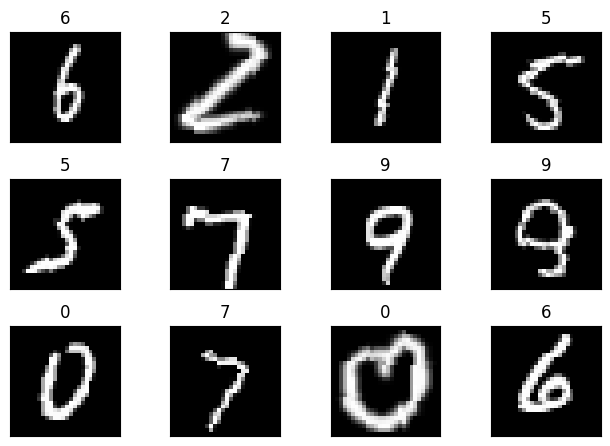

In [6]:
# visualise data
utils.visualise_data(12,train_loader)

In [7]:
# load model and summarise
device = 'cuda' if cuda else 'cpu'
mymodel = model.Net().to(device)
utils.summarise_model(mymodel)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
train_losses = []
test_losses = []
train_accs = []
test_accs = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
# train model
optimizer = optim.SGD(mymodel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 5
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_loss,train_acc = model.train(mymodel, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    test_loss,test_acc = model.test(mymodel, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3228 Batch_id=117 Accuracy=45.59: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]


Test set: Average loss: 0.0006, Accuracy: 9064/10000 (90.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1047 Batch_id=117 Accuracy=93.00: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0002, Accuracy: 9698/10000 (96.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1135 Batch_id=117 Accuracy=95.94: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0001, Accuracy: 9760/10000 (97.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0653 Batch_id=117 Accuracy=96.83: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0001, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0633 Batch_id=117 Accuracy=97.24: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]


Test set: Average loss: 0.0001, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.


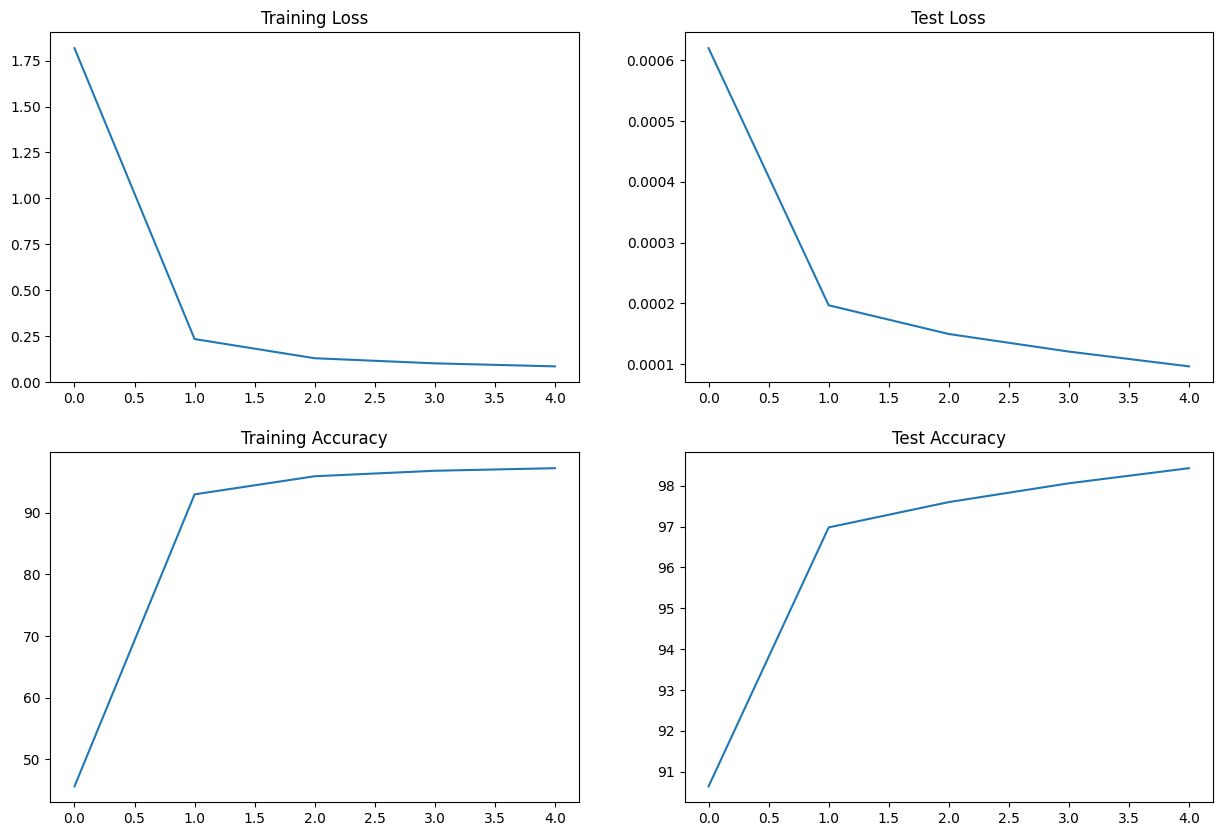

In [11]:
# plot losses and accuracy
utils.plot_losses(train_losses,train_accs,test_losses,test_accs)